# Import and load data

In [1]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import VGG16

from tqdm import tqdm
import os
from sklearn.utils import shuffle
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings

In [2]:
# load images
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join('C:/Users/Xunuo/final/image_process/train_image',i)
    #Enter the path of training data, replace this by new path in your PC 
    #Enter "task_B_train_image" here
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('C:/Users/Xunuo/final/image_process/test_image',i)
    ##Enter the path of testing data, replace this by new path in your PC
    #Enter "task_b_test_image" here
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|█████████████████████████████████████████████████████████████████████████████████| 37/37 [00:00<00:00, 506.63it/s]


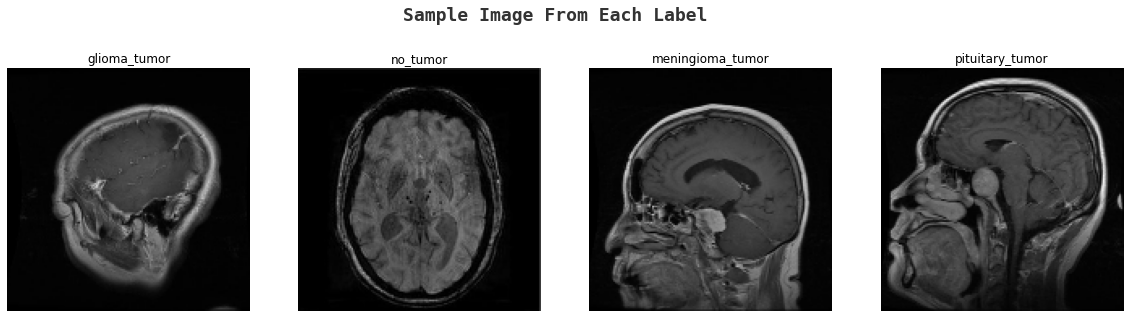

In [3]:
# Show example image of labels
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [4]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)
X_train.shape

(3200, 150, 150, 3)

In [5]:
# Define train and test sets
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [6]:
#Set batch size and number of epochs
batch_size=32
epochs = 50

# Trianing model
In this part, you need to choose one from THREE different architectures of CNN. When finishing running the plot figure part, directly jump to next prediction part.  
If you want to running another one, you best restart kernel and clear output then restart all new cells with another model.

## 1.Sequential

In [7]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same',input_shape=(image_size,image_size,3))) 
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization()) 

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(BatchNormalization())
model.add(Dropout(0.35)) #64 --> 42

model.add(Conv2D(64, (3, 3), padding='same')) 
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Flatten()) 
model.add(Dropout(0.5)) 
model.add(Dense(512)) 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(4)) 
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 150, 150, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 148, 148, 64)      36928     
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 74, 74, 64)        2

In [8]:
model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [9]:
# Ready for callsback
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("cnn.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [10]:
# Start training
history = model.fit(X_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/50
81/81 [==============================] - 15s 77ms/step - loss: 1.2667 - accuracy: 0.6265 - val_loss: 4.7974 - val_accuracy: 0.2257

Epoch 00001: val_accuracy improved from -inf to 0.22569, saving model to cnn.h5
Epoch 2/50
81/81 [==============================] - 6s 75ms/step - loss: 0.6592 - accuracy: 0.7631 - val_loss: 1.0514 - val_accuracy: 0.6597

Epoch 00002: val_accuracy improved from 0.22569 to 0.65972, saving model to cnn.h5
Epoch 3/50
81/81 [==============================] - 6s 76ms/step - loss: 0.4879 - accuracy: 0.8449 - val_loss: 0.6468 - val_accuracy: 0.8229

Epoch 00003: val_accuracy improved from 0.65972 to 0.82292, saving model to cnn.h5
Epoch 4/50
81/81 [==============================] - 6s 77ms/step - loss: 0.4385 - accuracy: 0.8484 - val_loss: 0.6373 - val_accuracy: 0.7743

Epoch 00004: val_accuracy did not improve from 0.82292
Epoch 5/50
81/81 [==============================] - 6s 77ms/step - loss: 0.3465 - accuracy: 0.8823 - val_loss: 0.6790 - val_accura

81/81 [==============================] - 6s 75ms/step - loss: 0.0485 - accuracy: 0.9842 - val_loss: 0.5191 - val_accuracy: 0.8854

Epoch 00036: val_accuracy did not improve from 0.90625
Epoch 37/50
81/81 [==============================] - 6s 75ms/step - loss: 0.0515 - accuracy: 0.9861 - val_loss: 0.5186 - val_accuracy: 0.8854

Epoch 00037: val_accuracy did not improve from 0.90625

Epoch 00037: ReduceLROnPlateau reducing learning rate to 4.7829690208445185e-11.
Epoch 38/50
81/81 [==============================] - 6s 75ms/step - loss: 0.0496 - accuracy: 0.9830 - val_loss: 0.5174 - val_accuracy: 0.8854

Epoch 00038: val_accuracy did not improve from 0.90625
Epoch 39/50
81/81 [==============================] - 6s 75ms/step - loss: 0.0475 - accuracy: 0.9850 - val_loss: 0.5194 - val_accuracy: 0.8854

Epoch 00039: val_accuracy did not improve from 0.90625

Epoch 00039: ReduceLROnPlateau reducing learning rate to 1.434890747886719e-11.
Epoch 40/50
81/81 [==============================] - 6s 7

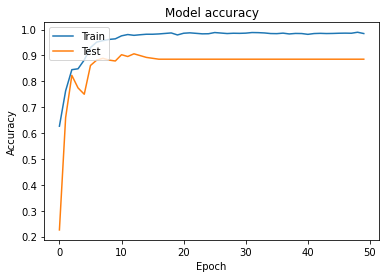

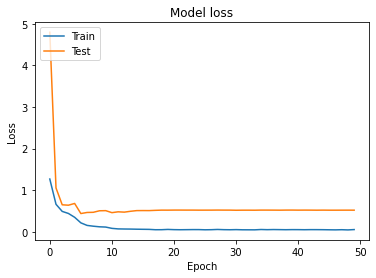

In [11]:
# Plot accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 2.EfficientNetB0

In [ ]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

model.summary()

In [ ]:
model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

# Ready for callsback
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("cnn.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [ ]:
# Start training
history = model.fit(X_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

In [ ]:
# Plot accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 3.VGG16

In [ ]:
vgg_model=VGG16(input_shape=(image_size,image_size,3) , weights='imagenet' , include_top=False,pooling="max")
for layer in vgg_model.layers:
    layer.trainable  = False

vgg_model.summary()

In [ ]:
model = Sequential()
model.add(vgg_model)

model.add(Flatten()) 
model.add(Activation('relu'))
Dropout(rate=0.5)
model.add(Dense(4)) 
model.add(Activation('softmax'))

model.summary()

In [ ]:
model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [ ]:
# Ready for callsback
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("cnn.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [ ]:
# Start training
history = model.fit(X_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

In [ ]:
# Plot accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Prediction

In [12]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

In [13]:
#print out classification report
from sklearn.metrics import classification_report

print(classification_report(y_test_new,pred))


              precision    recall  f1-score   support

           0       0.88      0.85      0.87        96
           1       0.70      0.70      0.70        47
           2       0.96      0.92      0.94        89
           3       0.86      0.93      0.90        88

    accuracy                           0.87       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.87      0.87      0.87       320



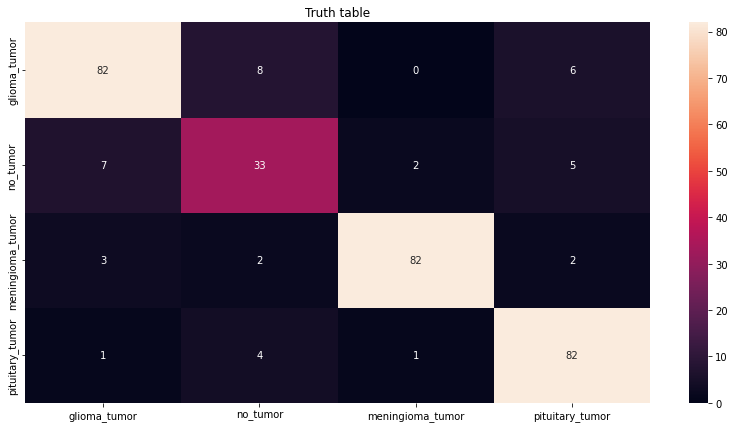

In [14]:
#Print out Truth table
from sklearn.metrics import confusion_matrix

fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True)

plt.title("Truth table")
plt.show()

# Upload and prediction

In [15]:
#Define a function, you can upload any type of MRI image, and click predict to let the machine output its corresponding type.
#This might be not 100% correct!
def img_pred(upload):
    for name, file_info in uploader.value.items():
        img = Image.open(io.BytesIO(file_info['content']))
    opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img = cv2.resize(opencvImage,(150,150))
    img = img.reshape(1,150,150,3)
    p = model.predict(img)
    p = np.argmax(p,axis=1)[0]

    if p==0:
        p='Glioma Tumor'
    elif p==1:
        print('The model predicts that there is no tumor')
    elif p==2:
        p='Meningioma Tumor'
    else:
        p='Pituitary Tumor'

    if p!=1:
        print(f'The Model predicts that it is a {p}')

In [16]:
import ipywidgets as widgets

uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

In [17]:
from IPython.display import display,clear_output

button = widgets.Button(description='Predict')
out = widgets.Output()
def on_button_clicked(_):
    with out:
        clear_output()
        try:
            img_pred(uploader)
            
        except:
            print('No Image Uploaded/Invalid Image File')
button.on_click(on_button_clicked)
widgets.VBox([button,out])